
# Deep Learning - Lab 4
## Multiclass Image Classification using Fully Connected Neural Networks

-----------------------------------------------------

### Faizaan Al Faisal

_________________________________________________

# Dataset
The given dataset is a large-scale face dataset with long age span (range from 0 to 116 years old). The dataset consists of over 20,000 face images with annotations of age, gender, and ethnicity. We will be using only 7000 of the 20,000 images. The dataset in this assignment is going to be used on the following task:

## Given the pixels of an image, perform ethnicity classification for the image using a fully connected neural network.


The dataset for this lab is already cleaned and provided in a CSV format for you with images included as pixel values.

The 4 columns contain the following information:


* **[age]** is an integer from 0 to 116, indicating the age. You can convert it to float for regression predictions
* **[gender]** is either 0 (male) or 1 (female)
* **[race]** is an integer from 0 to 4, denoting White, Black, Asian, Indian, and Others (like Hispanic, Latino, Middle Eastern).
*  The 4th column contains the pixels of the images flattened to a single dimension. Each of the original image is of size 48x48 and the flattened image vector consists of 48x48 = 2304 pixel values.

## You would be only using the Ethnicity Labels for your task and discard the Age and Gender labels for this lab.

In [1]:
!gdown https://drive.google.com/file/d/1_KRWsOhQNf6BZcdu4pg2JVy-lHo7_Cno/view?usp=sharing --fuzzy

Downloading...
From: https://drive.google.com/uc?id=1_KRWsOhQNf6BZcdu4pg2JVy-lHo7_Cno
To: /content/DL_assignment1_dataset.csv
100% 199M/199M [00:06<00:00, 32.2MB/s]


In [2]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Lets use pandas to load our data
df = pandas.read_csv("/content/DL_assignment1_dataset.csv")
df

,age,ethnicity,gender,pixels
0,1,2,0,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,202 205 209 210 209 209 210 211 212 214 218 21...
...,...,...,...,...
23700,99,0,1,127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701,99,1,1,23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702,99,2,1,59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703,99,2,1,45 108 120 156 206 197 140 180 191 199 204 207...


### For this assignment we will be using fully connected neural networks and hence to keep things simple we will only use 7000 of the ~20000 images for quick training times.

### Please do not change the seed for the sampling of data points.

In [4]:
random_seed = 42
df_sampled = df.sample(n=7000, random_state=random_seed)
df_sampled.reset_index(drop=True, inplace=True)
df_sampled

,age,ethnicity,gender,pixels
0,49,1,1,31 32 28 27 34 38 37 40 47 51 52 57 72 93 118 ...
1,39,1,0,186 65 38 40 36 51 64 64 60 55 58 60 73 79 82 ...
2,8,4,0,20 23 35 34 45 65 69 72 79 92 106 115 134 148 ...
3,40,4,0,6 6 13 19 15 23 41 76 106 125 133 138 152 158 ...
4,27,0,0,31 31 29 51 98 136 162 175 176 178 178 179 184...
...,...,...,...,...
6995,49,3,0,128 130 131 131 132 134 134 140 72 43 102 77 1...
6996,28,1,1,28 22 19 23 16 22 19 31 64 81 88 96 108 120 13...
6997,32,3,1,221 229 227 200 166 115 146 198 186 184 178 15...
6998,41,0,0,58 61 76 58 83 71 74 90 71 112 77 91 111 135 1...


Let us take a look at an image. You will get an idea of how to process your data for your neural network.

The 4th column contains all the pixel values in a string for each image. Lets convert all the strings to arrays first.

In [5]:
def string_to_array(pixel_string):
    pixel_list = pixel_string.split()
    pixel_array = np.array([int(value) for value in pixel_list])
    return pixel_array

In [6]:
df_sampled['pixels'] = df_sampled['pixels'].apply(string_to_array)

In [7]:
df_sampled['pixels']

0       [31, 32, 28, 27, 34, 38, 37, 40, 47, 51, 52, 5...
1       [186, 65, 38, 40, 36, 51, 64, 64, 60, 55, 58, ...
2       [20, 23, 35, 34, 45, 65, 69, 72, 79, 92, 106, ...
3       [6, 6, 13, 19, 15, 23, 41, 76, 106, 125, 133, ...
4       [31, 31, 29, 51, 98, 136, 162, 175, 176, 178, ...
                              ...                        
6995    [128, 130, 131, 131, 132, 134, 134, 140, 72, 4...
6996    [28, 22, 19, 23, 16, 22, 19, 31, 64, 81, 88, 9...
6997    [221, 229, 227, 200, 166, 115, 146, 198, 186, ...
6998    [58, 61, 76, 58, 83, 71, 74, 90, 71, 112, 77, ...
6999    [19, 21, 20, 23, 33, 54, 90, 128, 149, 169, 17...
Name: pixels, Length: 7000, dtype: object

Our "pixels" column has been converted to arrays which we can now use as input features to our model

Lets show the first image of our dataset

Age: 28
Ethnicity: 3
Gender: 0


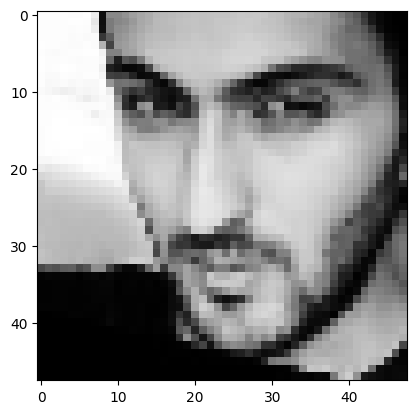

In [8]:
index = 30
first_image = df_sampled['pixels'][index]
image = first_image.reshape((48,48))
print("Age: "+str(df_sampled["age"][index])+"\nEthnicity: "+str(df_sampled["ethnicity"][index])+ "\nGender: "+str(df_sampled["gender"][index]))
plt.imshow(image,cmap="gray")

Uptill now, an initial processing has already been done using pandas in this starter code jupyter notebook. Hence you have a data frame ready for your assignment.

Please use the dataframe "df_sampled".

# You should consult the Lab 4 document provided to you for the tasks that are needed to be done for the successful completion. Grading rubricks are also mentioned in detail there.



In [65]:
# Write any further imports you need here
import torch
from torch import nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score

In [66]:
#### ---------------- CUDA GPU available ---------------- ####
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print ('CUDA available:', use_cuda)

CUDA available: True


________________________________
## Class definitions:
The following includes the Neural Network class, the Custom Dataset class to make use of PyTorch DataLoaders, as well as a Custom PyTorch style transformation to normalize the data

In [67]:
#### ---------------- neural network class ---------------- ####
class LabClassifier(nn.Module):
  def __init__(self, output_classes, input_size):
    super(LabClassifier, self).__init__()
    self.flatten = nn.Flatten()
    self.layer_stack = nn.Sequential(
        nn.Linear(input_size, 512),
        nn.PReLU(num_parameters=1, init=0.25),
        nn.Dropout(0.5),

        nn.Linear(512, 256),
        nn.PReLU(num_parameters=1, init=0.25),
        nn.Dropout(0.5),

        nn.Linear(256, 128),
        nn.ReLU(),
        nn.Dropout(0.4),

        nn.Linear(128, 32),
        nn.ReLU(),

        nn.Linear(32, output_classes),
    )


  def forward(self, x):
    x = self.flatten(x)
    logits = self.layer_stack(x)
    return logits

In [68]:
#### ---------------- dataset class for data loaders ---------------- ####

class LabDataset(Dataset):
  def __init__(self, data, transform=None):
    self.data = data
    self.transform = transform

  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    item = {
              'age': self.data.iloc[idx, 0],
              'ethnicity': self.data.iloc[idx, 1],
              'gender': self.data.iloc[idx, 2],
              'pixels': self.data.iloc[idx, 3]
            }
    item = self.transform(item)
    return item

In [69]:
#### ---------------- custom pytorch transformation for data ---------------- ####
class Normalizer(object):
  def __call__(self, item):
    # 'item' contains an entry from the dataset
    pixels_norm = np.array(item['pixels'])
    pixels_norm = (pixels_norm - pixels_norm.min()) / (pixels_norm.max() - pixels_norm.min())
    return {
              'age': torch.tensor(item['age'], dtype=torch.float32),
              'ethnicity': torch.tensor(item['ethnicity'], dtype=torch.long),
              'gender': torch.tensor(item['gender'], dtype=torch.int),
              'pixels': torch.tensor(pixels_norm, dtype=torch.float32)
            }

________________________________________________________________________
## Module functions
The following are training, validation, and testing functions to follow the modular code requirement of the lab

In [70]:
# runs one epoch of training phase
def model_train(model, loss_func, optimizer, data_loader):
  model.train()
  running_loss = 0.0
  correct = 0
  total = 0

  for batch in data_loader:
    # extract input and labels from the batch
    inputs = batch['pixels']
    labels = batch['ethnicity']

    # calculate initial predicted outputs & label (forward prop)
    optimizer.zero_grad()
    outputs = model(inputs)
    _, predicted = torch.max(outputs, 1)

    # calculate loss using cross-entropy loss
    loss = loss_func(outputs, labels)

    # backward propagation
    loss.backward()
    optimizer.step()
    running_loss += loss.item()

    # accuracy calc
    total += labels.size(0)
    correct += (predicted==labels).sum().item()


  # calculate acc and loss for training in one epoch
  acc = correct / total
  loss = running_loss / len(train_loader)
  return acc, loss

In [71]:
# runs one epoch of validation phase
def model_val(model, loss_func, data_loader):
  model.eval()
  running_loss = 0.0
  correct = 0
  all_labels = [] # saving labels and predicted so f1 score can be calculated with scikit
  all_predicted = []

  with torch.no_grad():
    for batch in data_loader:
      # extract input and labels from the batch
      inputs = batch['pixels']
      labels = batch['ethnicity']

      # predict labels based on provided inputs and calculate running_loss
      outputs = model(inputs)
      val_loss = loss_func(outputs, labels)
      running_loss += val_loss.item()

      # append labels and predicted labels for calculating f1 and acc
      _, predicted = torch.max(outputs, 1) # get actual predicted label
      correct += (predicted == labels).sum().item()
      all_labels += labels
      all_predicted += predicted

  acc = correct  /  len(all_labels) # correct / total
  loss = running_loss / len(data_loader) # avg loss for this epoch
  f1 = f1_score(all_labels, all_predicted, average='weighted')

  return acc, loss, f1

In [72]:
# tests the final performance of the model
def model_test(model, loss_func, data_loader):
  # ensure model is in eval mode
  model.eval()
  all_labels = []
  all_predicted = []
  correct = 0
  running_loss = 0.0

  with torch.no_grad():
    for batch in data_loader:
      # extract input and labels from the batch
      inputs = batch['pixels']
      labels = batch['ethnicity']

      # determine output, predicted label, and loss
      outputs = model(inputs)
      _, predicted = torch.max(outputs, 1)
      test_loss = loss_func(outputs, labels)
      running_loss += test_loss.item()

      correct += (predicted == labels).sum().item()

      # append to lists
      all_predicted += predicted
      all_labels += labels

  acc = correct / len(all_labels)
  loss = running_loss / len(data_loader)
  f1 = f1_score(all_labels, all_predicted, average='weighted')
  cm = confusion_matrix(all_labels, all_predicted)
  return acc, loss, f1, cm

____________________________________________________
## Driver code
This includes the handling and splitting of datasets, creating all necessary steps to build and train a model, as well as displaying the results.

In [73]:
#### --------------------------- data handling --------------------------- ####

# splitting the dataset
train, temp_test = train_test_split(df_sampled, test_size=0.3, random_state=40)
test, val = train_test_split(temp_test, test_size=0.5, random_state=40)

print("Training data contains: ", len(train), " entries")
print("Validation data contains: ", len(val), " entries")
print("Testing data contains: ", len(test), " entries\n\n")

# converting to custom dataset classes:
transform = transforms.Compose([Normalizer()])
train_data = LabDataset(train, transform)
val_data = LabDataset(val, transform)
test_data = LabDataset(test, transform)

# data loaders
batch = 32
train_loader = DataLoader(train_data, batch_size=batch, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch)

Training data contains:  4900  entries
Validation data contains:  1050  entries
Testing data contains:  1050  entries




In [74]:
print("Occurrences of each label:")
print(train['ethnicity'].value_counts())

Occurrences of each label:
0    2094
1     932
3     811
2     708
4     355
Name: ethnicity, dtype: int64


In [75]:
#### ---------------- creating model/loss_function/optimizer ---------------- ####

# model
input_size = len(train_data[0]['pixels']) # img size
output_classes = len(train['ethnicity'].unique()) # num of unique classes
model = LabClassifier(output_classes, input_size)

# loss function - specifying class weights since some classes have fewer entries than others
ce_loss = nn.CrossEntropyLoss( weight=torch.tensor([0.12, 0.18, 0.18, 0.22, 0.3]) )

# optimizer - Adam
lr = 0.0001
optimizer = optim.Adam(model.parameters(), lr=lr)

In [76]:
#### ---------------- train and test the model ---------------- ####
epochs = 50

# lists for collecting plotting data
train_accs = []
train_losses = []
val_accs = []
val_losses = []
val_f1s = []

for epoch in range(epochs):

  # train and test the models, collect all returned values
  train_acc, train_loss = model_train(model, ce_loss, optimizer, train_loader)
  val_acc, val_loss, val_f1 = model_val(model, ce_loss, val_loader)

  # append to relevant arrays
  train_accs.append(train_acc)
  train_losses.append(train_loss)
  val_accs.append(val_acc)
  val_losses.append(val_loss)
  val_f1s.append(val_f1)

  print(f"Epoch {epoch+1}\n----------------")
  print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Validation Loss: {val_loss:.4f}, Validation Acc: {val_acc:.4f}, F1 score: {val_f1:.4f}\n\n")


Epoch 1
----------------
Train Loss: 1.5675, Train Acc: 0.3941, Validation Loss: 1.5276, Validation Acc: 0.4533, F1 score: 0.2828


Epoch 2
----------------
Train Loss: 1.5532, Train Acc: 0.4255, Validation Loss: 1.5228, Validation Acc: 0.4619, F1 score: 0.3011


Epoch 3
----------------
Train Loss: 1.5444, Train Acc: 0.4335, Validation Loss: 1.5049, Validation Acc: 0.4619, F1 score: 0.3010


Epoch 4
----------------
Train Loss: 1.5255, Train Acc: 0.4431, Validation Loss: 1.4989, Validation Acc: 0.4924, F1 score: 0.4155


Epoch 5
----------------
Train Loss: 1.5015, Train Acc: 0.4616, Validation Loss: 1.4468, Validation Acc: 0.5152, F1 score: 0.4088


Epoch 6
----------------
Train Loss: 1.4624, Train Acc: 0.4831, Validation Loss: 1.3745, Validation Acc: 0.5419, F1 score: 0.4623


Epoch 7
----------------
Train Loss: 1.4059, Train Acc: 0.5147, Validation Loss: 1.3074, Validation Acc: 0.5590, F1 score: 0.5199


Epoch 8
----------------
Train Loss: 1.3635, Train Acc: 0.5243, Validation L

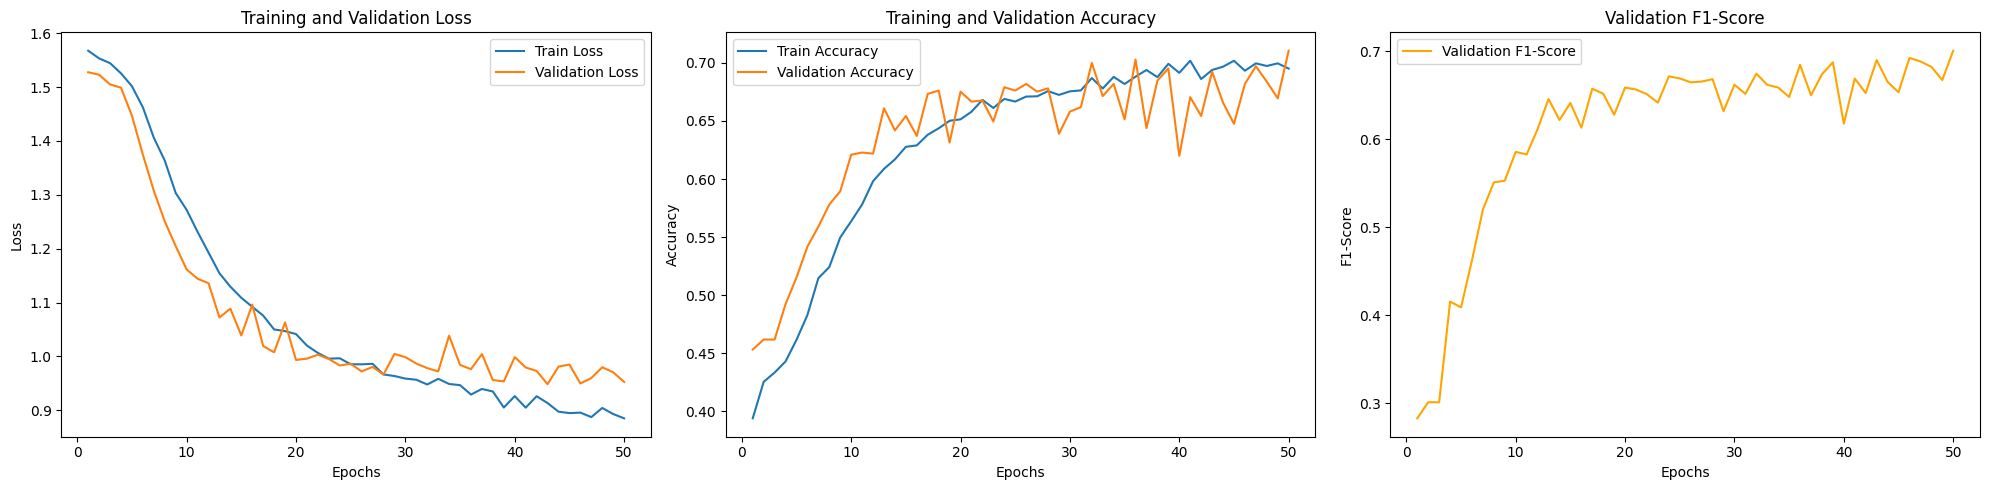

In [77]:
#### ---------------- plot the findings ---------------- ####

# using subplots
fig, axs = plt.subplots(1, 3, figsize=(20,5))
eps = range(1, epochs+1)

# val_loss and train_loss against each epoch
axs[0].plot(eps, train_losses, label='Train Loss')
axs[0].plot(eps, val_losses, label='Validation Loss')
axs[0].set_title('Training and Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()

# Plot val_acc and train_acc against each epoch
axs[1].plot(eps, train_accs, label='Train Accuracy')
axs[1].plot(eps, val_accs, label='Validation Accuracy')
axs[1].set_title('Training and Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

# Plot val_f1 against each epoch
axs[2].plot(eps, val_f1s, label='Validation F1-Score', color='orange')
axs[2].set_title('Validation F1-Score')
axs[2].set_xlabel('Epochs')
axs[2].set_ylabel('F1-Score')
axs[2].legend()

# Adjust layout
plt.tight_layout()
plt.show()


In [78]:
#### ---------------- final model testing ---------------- ####
model_acc, model_loss, model_f1, model_cm = model_test(model, ce_loss, test_loader)

print(f"Model Accuracy: {model_acc:.4f},  Model Loss {model_loss:.4f},  Model F1 Score: {model_f1:.4f}\n")
print(f"Model Confusion Matrix: \n {model_cm}")

Model Accuracy: 0.6829,  Model Loss 0.9848,  Model F1 Score: 0.6763

Model Confusion Matrix: 
 [[358  22  26  44  12]
 [ 23 135   4  17   4]
 [ 37   9 102   9   1]
 [ 47   7  10 108   4]
 [ 23   3   8  23  14]]
